In [4]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as sklm

sys.path.append("..")
from util import plot

%matplotlib inline

In [5]:
df = pd.read_pickle("../run/synth/solo/ez/df.pkl")

observed
0.050: 0.81 0.27
0.100: 0.72 0.55
--------------------
hidden-random
0.050: 0.09 0.04
0.100: 0.03 0.07
--------------------
hidden-nearmiss
0.050: 0.33 0.11
0.100: 0.16 0.19
--------------------


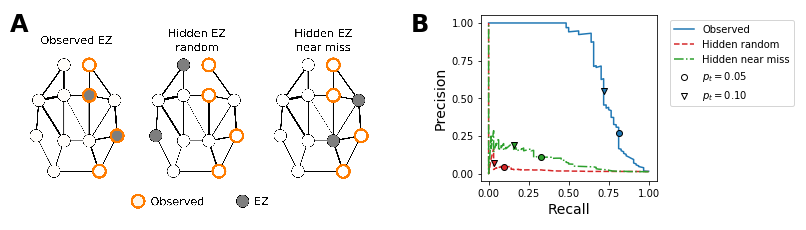

In [6]:
fig = plt.figure(figsize=(11,3))

gs = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[8, 1],
                       wspace=0.4, left=0.02, right=0.82, bottom=0.01, top=0.96)

ax0 = plt.subplot(gs[:, 0])
img = plt.imread("../etc/ez-scenarios.png")
plt.imshow(img, interpolation='none')
# plt.xticks([]); plt.yticks([])
plt.axis('off')

configs = ['observed', 'hidden-random', 'hidden-nearmiss']
labels = ["Observed", "Hidden random", "Hidden near miss"]
colors = ['tab:blue', 'tab:red', 'tab:green']
linestyles = ['-', '--', '-.']

thresholds = [0.05, 0.1]
markers = ['o', 'v', 's']

ax1 = plt.subplot(gs[0, 1])
for i, config in enumerate(configs):
    dff = df[(df.config == config)] #  & (~df.observed)]
    prec, rec, thresh = sklm.precision_recall_curve(dff.ctru > 2, dff.pez)

    plt.plot(rec, prec, label=labels[i], ls=linestyles[i], color=colors[i])
    
    print(config)
    for thr, marker in zip(thresholds, markers):
        j = np.where(thresh > thr)[0][0]
        plt.scatter(rec[j], prec[j], c=colors[i], marker=marker, ec='k', zorder=5)
        print(f"{thr:.3f}: {rec[j]:.2f} {prec[j]:.2f}")
    print("--------------------")

plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.xticks([0., 0.25, 0.5, 0.75, 1.])
plt.yticks([0., 0.25, 0.5, 0.75, 1.])
        
# plt.legend(loc='upper right')
for thr, marker in zip(thresholds, markers):
    plt.scatter([], [], marker=marker, color='w', ec='k', label=f"$p_t = {thr:4.2f}$")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
# plot.add_panel_letters(fig, [ax0, ax1], fontsize=24, xpos=[-0.05, -0.4], ypos=[0.96, 0.9])
bg = plot.Background(visible=False)
bg.labels([0.003, 0.51], [0.86, 0.86], fontsize=24)
plt.savefig("img/ez-discovery.pdf")